In [2]:
import pandas as pd
import numpy as np

## Import Data

In [3]:
df = pd.read_csv('F:/KULIAHHH/Semester 5/AI/Tugas/crawling/coba-lagi/tweets-data/baru_sby.csv', delimiter=";")

# Menampilkan jumlah baris (data) pada DataFrame
jumlah_data = df.shape[0]
print(jumlah_data)

1044


In [4]:
df.head(10)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Fri Nov 03 03:01:10 +0000 2023,1720274893080785044,@Ferdyan_SN @LtdAkbar Yg menolak kebijakan glo...,0,1,4,2,in,253865124,1720077817374011483,mas_prasetiyo,https://twitter.com/mas_prasetiyo/status/17202...
1,Tue Oct 17 01:59:20 +0000 2023,1714098739466707110,"@KAI121 Halo Min, ayah saya belum melakukan va...",0,1,0,0,in,1243771268144365568,1714098739466707110,yahoohoniess,https://twitter.com/yahoohoniess/status/171409...
2,Tue Oct 17 01:54:31 +0000 2023,1714097525458944279,"@KAI121 Halo Min, ayah saya belum melakukan va...",0,1,0,0,in,1243771268144365568,1714097525458944279,yahoohoniess,https://twitter.com/yahoohoniess/status/171409...
3,Mon Oct 09 02:05:33 +0000 2023,1711201202401337596,Lowongan Kerja Lidah Buaya Group SALES Kuali...,0,0,0,0,in,1237416418338992130,1711201202401337596,karirpurwokerto,https://twitter.com/karirpurwokerto/status/171...
4,Thu Aug 31 13:07:52 +0000 2023,1697234750627533198,3. Hal tersebut selaras dengan program pemerin...,0,0,0,1,in,737183024295469056,1697234589931254067,PTPAL_INDONESIA,https://twitter.com/PTPAL_INDONESIA/status/169...
5,Thu Aug 31 13:07:13 +0000 2023,1697234589931254067,1. Surabaya (31/08) Dalam karyawan yang sehat ...,0,1,1,5,in,737183024295469056,1697234589931254067,PTPAL_INDONESIA,https://twitter.com/PTPAL_INDONESIA/status/169...
6,Tue Aug 29 03:15:30 +0000 2023,1696360900314402889,@ch_chotimah2 @jokowi @mohmahfudmd @Dr_Moeldok...,0,0,0,0,in,2373724154,1696076188236869673,yudiwijayaa,https://twitter.com/yudiwijayaa/status/1696360...
7,Mon Aug 14 02:45:10 +0000 2023,1690917449850617856,Jadwal dan Lokasi Vaksin Covid-19 Surabaya Har...,0,0,0,0,in,79130206,1690917449850617856,jpnncom,https://twitter.com/jpnncom/status/16909174498...
8,Sat Aug 12 02:34:07 +0000 2023,1690189893044150274,Jadwal dan Lokasi Vaksin Covid-19 Surabaya Har...,0,0,0,0,in,79130206,1690189893044150274,jpnncom,https://twitter.com/jpnncom/status/16901898930...
9,Thu Aug 10 02:34:07 +0000 2023,1689465119942541312,Jadwal dan Lokasi Vaksin Covid-19 Surabaya Har...,0,0,0,0,in,79130206,1689465119942541312,jpnncom,https://twitter.com/jpnncom/status/16894651199...


In [5]:
# Manpilkan informasi seputar df_train
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           1044 non-null   object
 1   id_str               1044 non-null   int64 
 2   full_text            1044 non-null   object
 3   quote_count          1044 non-null   int64 
 4   reply_count          1044 non-null   int64 
 5   retweet_count        1044 non-null   int64 
 6   favorite_count       1044 non-null   int64 
 7   lang                 1044 non-null   object
 8   user_id_str          1044 non-null   int64 
 9   conversation_id_str  1044 non-null   int64 
 10  username             1044 non-null   object
 11  tweet_url            1044 non-null   object
dtypes: int64(7), object(5)
memory usage: 98.0+ KB


In [6]:
df.shape

(1044, 12)

In [7]:
df.isnull().sum()

created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64

In [8]:
df = df.drop(columns=['tweet_url', 'username', 'user_id_str', 'conversation_id_str', 'id_str', 'lang', 'quote_count', 'reply_count', 'favorite_count' ])

In [9]:
df.isnull().sum()

created_at       0
full_text        0
retweet_count    0
dtype: int64

## Text Preprocessing (Case Folding)

### Lower Case
Text preprocessing untuk mengubah seluruh huruf menjadi kecil(lower case). Alasannya agar ketika mencari data tidak dipengaruhi oleh besar kecilnya huruf.

In [10]:
df['full_text'] = df['full_text'].str.lower()

df.head(10)


,created_at,full_text,retweet_count
0,Fri Nov 03 03:01:10 +0000 2023,@ferdyan_sn @ltdakbar yg menolak kebijakan glo...,4
1,Tue Oct 17 01:59:20 +0000 2023,"@kai121 halo min, ayah saya belum melakukan va...",0
2,Tue Oct 17 01:54:31 +0000 2023,"@kai121 halo min, ayah saya belum melakukan va...",0
3,Mon Oct 09 02:05:33 +0000 2023,lowongan kerja lidah buaya group sales kuali...,0
4,Thu Aug 31 13:07:52 +0000 2023,3. hal tersebut selaras dengan program pemerin...,0
5,Thu Aug 31 13:07:13 +0000 2023,1. surabaya (31/08) dalam karyawan yang sehat ...,1
6,Tue Aug 29 03:15:30 +0000 2023,@ch_chotimah2 @jokowi @mohmahfudmd @dr_moeldok...,0
7,Mon Aug 14 02:45:10 +0000 2023,jadwal dan lokasi vaksin covid-19 surabaya har...,0
8,Sat Aug 12 02:34:07 +0000 2023,jadwal dan lokasi vaksin covid-19 surabaya har...,0
9,Thu Aug 10 02:34:07 +0000 2023,jadwal dan lokasi vaksin covid-19 surabaya har...,0


### Deleting numbers
Angka dihapus karena tidak relevan dengan analisa yang kami lakukan,angka tidak menghasilkan konotasi positif atau negatif.

In [11]:
import re 

df['full_text'] = df['full_text'].replace('\d', '', regex=True)
df.head(10)

,created_at,full_text,retweet_count
0,Fri Nov 03 03:01:10 +0000 2023,@ferdyan_sn @ltdakbar yg menolak kebijakan glo...,4
1,Tue Oct 17 01:59:20 +0000 2023,"@kai halo min, ayah saya belum melakukan vaksi...",0
2,Tue Oct 17 01:54:31 +0000 2023,"@kai halo min, ayah saya belum melakukan vaksi...",0
3,Mon Oct 09 02:05:33 +0000 2023,lowongan kerja lidah buaya group sales kuali...,0
4,Thu Aug 31 13:07:52 +0000 2023,. hal tersebut selaras dengan program pemerint...,0
5,Thu Aug 31 13:07:13 +0000 2023,. surabaya (/) dalam karyawan yang sehat terda...,1
6,Tue Aug 29 03:15:30 +0000 2023,@ch_chotimah @jokowi @mohmahfudmd @dr_moeldoko...,0
7,Mon Aug 14 02:45:10 +0000 2023,jadwal dan lokasi vaksin covid- surabaya hari ...,0
8,Sat Aug 12 02:34:07 +0000 2023,jadwal dan lokasi vaksin covid- surabaya hari ...,0
9,Thu Aug 10 02:34:07 +0000 2023,jadwal dan lokasi vaksin covid- surabaya hari ...,0


### Handle Emoji
Emoji dihapus karena belum tentu menunjukkan makna sesuangguhnya.Contoh emoji tersenyum belum tentu berkonotasi positif.

:-) adalah emotikon dan 😜 → emoji.

In [12]:
# !pip install emoji


In [13]:
import re
import emoji

# Fungsi untuk menghapus emoji
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # simbol & transportasi
                               u"\U0001F680-\U0001F6FF"  # ikon bisnis
                               u"\U0001F700-\U0001F77F"  # ikon kantor
                               u"\U0001F780-\U0001F7FF"  # ikon komunikasi
                               u"\U0001F800-\U0001F8FF"  # ikon komputasi
                               u"\U0001F900-\U0001F9FF"  # ikon alat
                               u"\U0001FA00-\U0001FA6F"  # ikon game
                               u"\U0001FA70-\U0001FAFF"  # ikon ekstra
                               u"\U00002702-\U000027B0"  # simbol umum
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Hapus emoji dari kolom 'full_text'
df['full_text'] = df['full_text'].apply(remove_emojis)

# Tampilkan DataFrame setelah perubahan
df.head(10)

,created_at,full_text,retweet_count
0,Fri Nov 03 03:01:10 +0000 2023,@ferdyan_sn @ltdakbar yg menolak kebijakan glo...,4
1,Tue Oct 17 01:59:20 +0000 2023,"@kai halo min, ayah saya belum melakukan vaksi...",0
2,Tue Oct 17 01:54:31 +0000 2023,"@kai halo min, ayah saya belum melakukan vaksi...",0
3,Mon Oct 09 02:05:33 +0000 2023,lowongan kerja lidah buaya group sales kuali...,0
4,Thu Aug 31 13:07:52 +0000 2023,. hal tersebut selaras dengan program pemerint...,0
5,Thu Aug 31 13:07:13 +0000 2023,. surabaya (/) dalam karyawan yang sehat terda...,1
6,Tue Aug 29 03:15:30 +0000 2023,@ch_chotimah @jokowi @mohmahfudmd @dr_moeldoko...,0
7,Mon Aug 14 02:45:10 +0000 2023,jadwal dan lokasi vaksin covid- surabaya hari ...,0
8,Sat Aug 12 02:34:07 +0000 2023,jadwal dan lokasi vaksin covid- surabaya hari ...,0
9,Thu Aug 10 02:34:07 +0000 2023,jadwal dan lokasi vaksin covid- surabaya hari ...,0


### Menghapus mention

Mention dihapus karena ketika tanda baca dihilangkan mana akan menghasilkan makna kata yang berbeda dan nama tidak menunjukkan konotasi positif atau negatif

In [14]:
# Fungsi untuk menghapus kata yang diawali dengan "@"
def remove_mentions(text):
    return ' '.join(word for word in text.split() if not word.startswith('@'))

# Menggunakan fungsi pada kolom 'full_text'
df['full_text'] = df['full_text'].apply(remove_mentions)

# Menampilkan hasil
print(df['full_text'])

0       yg menolak kebijakan globalis pasti diincar. i...
1       halo min, ayah saya belum melakukan vaksinasi ...
2       halo min, ayah saya belum melakukan vaksinasi ...
3       lowongan kerja lidah buaya group sales kualifi...
4       . hal tersebut selaras dengan program pemerint...
                              ...                        
1039    kemenkumham jatim, wisnu nugroho dewanto: sine...
1040    kemenkumham jatim, wisnu nugroho dewanto: sine...
1041    kemenkumham jatim, wisnu nugroho dewanto: sine...
1042    kemenkumham jatim, wisnu nugroho dewanto: sine...
1043    kemenkumham jatim, wisnu nugroho dewanto: sine...
Name: full_text, Length: 1044, dtype: object


### Menghapus Tanda Baca

Tanda baca dalam kalimat dihapus karena tidak memiliki pengaruh pada text preprocessing lalu digantikan dengan spasi sehingga jika tanda baca berupa `/` maka akan menghasilkan dua kata.

Tanpa spasi
Contoh: Booster/vaksin --> Boostervaksin

Dengan spasi
Contoh: Booster/vaksin --> Booster vaksin



In [15]:
# import re

# def remove_punctuation(text):
#     return re.sub(r'[^\w\s]', '', text)

# # Menghapus tanda baca dari kolom 'full_text'
# df['full_text'] = df['full_text'].apply(remove_punctuation)
# df.head(10)

import re

def replace_punctuation_with_space(text):
    return re.sub(r'[^\w\s]', ' ', text)

# Menggantikan tanda baca dengan spasi pada kolom 'full_text'
df['full_text'] = df['full_text'].apply(replace_punctuation_with_space)
df.head(10)

,created_at,full_text,retweet_count
0,Fri Nov 03 03:01:10 +0000 2023,yg menolak kebijakan globalis pasti diincar i...,4
1,Tue Oct 17 01:59:20 +0000 2023,halo min ayah saya belum melakukan vaksinasi ...,0
2,Tue Oct 17 01:54:31 +0000 2023,halo min ayah saya belum melakukan vaksinasi ...,0
3,Mon Oct 09 02:05:33 +0000 2023,lowongan kerja lidah buaya group sales kualifi...,0
4,Thu Aug 31 13:07:52 +0000 2023,hal tersebut selaras dengan program pemerint...,0
5,Thu Aug 31 13:07:13 +0000 2023,surabaya dalam karyawan yang sehat terda...,1
6,Tue Aug 29 03:15:30 +0000 2023,prabowo memang ikut orba pro amerika sby juga ...,0
7,Mon Aug 14 02:45:10 +0000 2023,jadwal dan lokasi vaksin covid surabaya hari ...,0
8,Sat Aug 12 02:34:07 +0000 2023,jadwal dan lokasi vaksin covid surabaya hari ...,0
9,Thu Aug 10 02:34:07 +0000 2023,jadwal dan lokasi vaksin covid surabaya hari ...,0


### Penghapusan URL
Menghapus URL dalam teks karena akan mengganggu proses tokenizing

In [16]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'https|https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


# Hapus URL dari kolom 'full_text'
df['full_text'] = df['full_text'].apply(remove_urls)


### Drop Duplicate column full_text

In [17]:
# drop duplicates/spams tweets
df.drop_duplicates(subset = 'full_text', inplace = True)

In [18]:
df.shape

(1044, 3)

### Tokenizing
Proses pemisahan teks menjadi potongan-potongan atau disebut token untuk kemudian dianalisa.

**Word Tokenization NLTK**

Menggunakan tokenizing kata dikarenakan output yang diinginkan adalah memodelkan vektor menjadi kata positif, negatif, dan netral.

Kami menggunakan NLTK dikarenakan dapat membagi atau memotong kalimat beserta tanda baca dari kata-kata, mampu menghasilkan token yang lebih akurat.

Sedangkan tokenization biasa hanya memisahkan kata berdasarkan spasi.  

Melihat frekuensi kemunculan pada setiap token menggunakan fungsi FreqDist() yang telah tersedia dalam modul NLTK

In [19]:
!pip install nltk 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\dllse\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
import nltk
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
  
# Install dan download jika belum dilakukan
nltk.download('punkt')

df['token'] = df['full_text'].apply(word_tokenize)

# Fungsi untuk menghitung frekuensi dan membuat FreqDist
def calculate_frequency(tokens):
    fdist = FreqDist(tokens)
    return fdist

# Menerapkan fungsi untuk menghitung frekuensi pada setiap baris
df['frequency'] = df['token'].apply(calculate_frequency)

# Menampilkan DataFrame dengan token dan frekuensinya
df


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dllse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,created_at,full_text,retweet_count,token,frequency
0,Fri Nov 03 03:01:10 +0000 2023,yg menolak kebijakan globalis pasti diincar i...,4,"[yg, menolak, kebijakan, globalis, pasti, diin...","{'yg': 1, 'menolak': 3, 'kebijakan': 1, 'globa..."
1,Tue Oct 17 01:59:20 +0000 2023,halo min ayah saya belum melakukan vaksinasi ...,0,"[halo, min, ayah, saya, belum, melakukan, vaks...","{'halo': 1, 'min': 1, 'ayah': 1, 'saya': 1, 'b..."
2,Tue Oct 17 01:54:31 +0000 2023,halo min ayah saya belum melakukan vaksinasi ...,0,"[halo, min, ayah, saya, belum, melakukan, vaks...","{'halo': 1, 'min': 1, 'ayah': 1, 'saya': 1, 'b..."
3,Mon Oct 09 02:05:33 +0000 2023,lowongan kerja lidah buaya group sales kualifi...,0,"[lowongan, kerja, lidah, buaya, group, sales, ...","{'lowongan': 1, 'kerja': 1, 'lidah': 1, 'buaya..."
4,Thu Aug 31 13:07:52 +0000 2023,hal tersebut selaras dengan program pemerint...,0,"[hal, tersebut, selaras, dengan, program, peme...","{'hal': 1, 'tersebut': 1, 'selaras': 1, 'denga..."
...,...,...,...,...,...
1039,Wed Mar 02 04:24:44 +0000 2022,kemenkumham jatim wisnu nugroho dewanto sine...,0,"[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","{'kemenkumham': 1, 'jatim': 1, 'wisnu': 1, 'nu..."
1040,Wed Mar 02 04:24:34 +0000 2022,kemenkumham jatim wisnu nugroho dewanto sine...,0,"[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","{'kemenkumham': 1, 'jatim': 1, 'wisnu': 1, 'nu..."
1041,Wed Mar 02 04:24:20 +0000 2022,kemenkumham jatim wisnu nugroho dewanto sine...,0,"[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","{'kemenkumham': 1, 'jatim': 1, 'wisnu': 1, 'nu..."
1042,Wed Mar 02 04:24:09 +0000 2022,kemenkumham jatim wisnu nugroho dewanto sine...,0,"[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","{'kemenkumham': 1, 'jatim': 1, 'wisnu': 1, 'nu..."


Menampilkan frekuensi kemunculan kata untuk 10 kata pertama menggunakan garfik

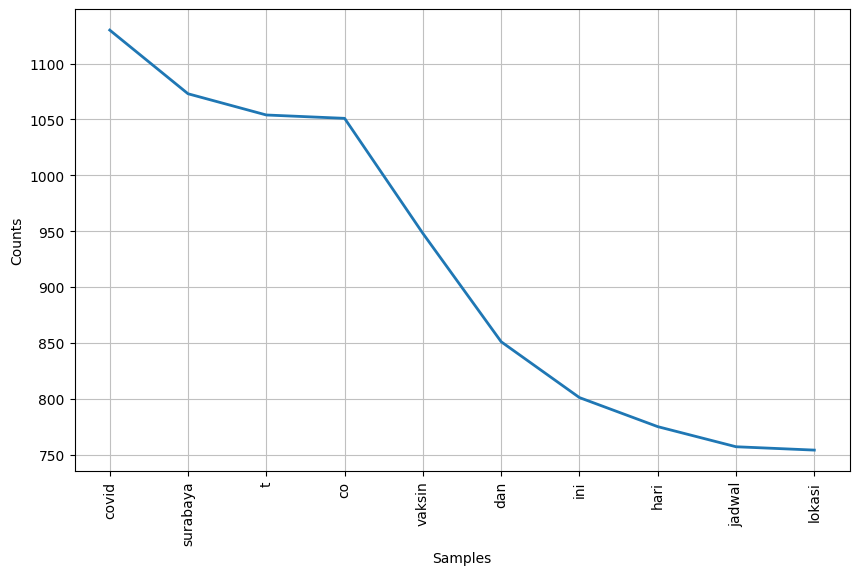

In [21]:
import matplotlib.pyplot as plt

# Menggabungkan frekuensi dari semua baris
combined_freqdist = FreqDist()
for freqdist in df['frequency']:
    combined_freqdist += freqdist

# Menampilkan grafik distribusi frekuensi untuk 10 kata teratas
plt.figure(figsize=(10, 6))
combined_freqdist.plot(10, cumulative=False)
plt.show()

### Filtering (Stopword Removal)

Filtering adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting).

In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

# Mengambil daftar stopword bahasa Indonesia
list_stopword = set(stopwords.words('indonesian'))

# Fungsi untuk menghapus stopword dari setiap baris token
def remove_stopwords(token):
    return [word for word in token if word.lower() not in list_stopword]

# Menghapus stopword dari setiap baris
df['filtered_token'] = df['token'].apply(remove_stopwords)

# Menampilkan hasil setelah penghapusan stopword
print(df['filtered_token'])

0       [yg, menolak, kebijakan, globalis, diincar, si...
1       [halo, min, ayah, vaksinasi, covid, usia, th, ...
2       [halo, min, ayah, vaksinasi, covid, usia, th, ...
3       [lowongan, kerja, lidah, buaya, group, sales, ...
4       [selaras, program, pemerintah, penanggulangan,...
                              ...                        
1039    [kemenkumham, jatim, wisnu, nugroho, dewanto, ...
1040    [kemenkumham, jatim, wisnu, nugroho, dewanto, ...
1041    [kemenkumham, jatim, wisnu, nugroho, dewanto, ...
1042    [kemenkumham, jatim, wisnu, nugroho, dewanto, ...
1043    [kemenkumham, jatim, wisnu, nugroho, dewanto, ...
Name: filtered_token, Length: 1044, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dllse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df.head(9)

,created_at,full_text,retweet_count,token,frequency,filtered_token
0,Fri Nov 03 03:01:10 +0000 2023,yg menolak kebijakan globalis pasti diincar i...,4,"[yg, menolak, kebijakan, globalis, pasti, diin...","{'yg': 1, 'menolak': 3, 'kebijakan': 1, 'globa...","[yg, menolak, kebijakan, globalis, diincar, si..."
1,Tue Oct 17 01:59:20 +0000 2023,halo min ayah saya belum melakukan vaksinasi ...,0,"[halo, min, ayah, saya, belum, melakukan, vaks...","{'halo': 1, 'min': 1, 'ayah': 1, 'saya': 1, 'b...","[halo, min, ayah, vaksinasi, covid, usia, th, ..."
2,Tue Oct 17 01:54:31 +0000 2023,halo min ayah saya belum melakukan vaksinasi ...,0,"[halo, min, ayah, saya, belum, melakukan, vaks...","{'halo': 1, 'min': 1, 'ayah': 1, 'saya': 1, 'b...","[halo, min, ayah, vaksinasi, covid, usia, th, ..."
3,Mon Oct 09 02:05:33 +0000 2023,lowongan kerja lidah buaya group sales kualifi...,0,"[lowongan, kerja, lidah, buaya, group, sales, ...","{'lowongan': 1, 'kerja': 1, 'lidah': 1, 'buaya...","[lowongan, kerja, lidah, buaya, group, sales, ..."
4,Thu Aug 31 13:07:52 +0000 2023,hal tersebut selaras dengan program pemerint...,0,"[hal, tersebut, selaras, dengan, program, peme...","{'hal': 1, 'tersebut': 1, 'selaras': 1, 'denga...","[selaras, program, pemerintah, penanggulangan,..."
5,Thu Aug 31 13:07:13 +0000 2023,surabaya dalam karyawan yang sehat terda...,1,"[surabaya, dalam, karyawan, yang, sehat, terda...","{'surabaya': 2, 'dalam': 1, 'karyawan': 1, 'ya...","[surabaya, karyawan, sehat, semangat, kerja, k..."
6,Tue Aug 29 03:15:30 +0000 2023,prabowo memang ikut orba pro amerika sby juga ...,0,"[prabowo, memang, ikut, orba, pro, amerika, sb...","{'prabowo': 2, 'memang': 1, 'ikut': 1, 'orba':...","[prabowo, orba, pro, amerika, sby, pro, amerik..."
7,Mon Aug 14 02:45:10 +0000 2023,jadwal dan lokasi vaksin covid surabaya hari ...,0,"[jadwal, dan, lokasi, vaksin, covid, surabaya,...","{'jadwal': 1, 'dan': 1, 'lokasi': 1, 'vaksin':...","[jadwal, lokasi, vaksin, covid, surabaya, agus..."
8,Sat Aug 12 02:34:07 +0000 2023,jadwal dan lokasi vaksin covid surabaya hari ...,0,"[jadwal, dan, lokasi, vaksin, covid, surabaya,...","{'jadwal': 1, 'dan': 1, 'lokasi': 1, 'vaksin':...","[jadwal, lokasi, vaksin, covid, surabaya, agus..."


### Lemmatize

Dilakukan untuk mengubah kata menjadi kata dasar dengan mengetahui konteks dari kata tersebut

In [24]:
from nltk.stem import WordNetLemmatizer

# Download the WordNet resource
nltk.download('wordnet')

# Create a lemmatizer object
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    return lemmatized

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dllse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
df['lemmatized_tokens'] = df['filtered_token'].apply(lemmatize)
df

,created_at,full_text,retweet_count,token,frequency,filtered_token,lemmatized_tokens
0,Fri Nov 03 03:01:10 +0000 2023,yg menolak kebijakan globalis pasti diincar i...,4,"[yg, menolak, kebijakan, globalis, pasti, diin...","{'yg': 1, 'menolak': 3, 'kebijakan': 1, 'globa...","[yg, menolak, kebijakan, globalis, diincar, si...","[yg, menolak, kebijakan, globalis, diincar, si..."
1,Tue Oct 17 01:59:20 +0000 2023,halo min ayah saya belum melakukan vaksinasi ...,0,"[halo, min, ayah, saya, belum, melakukan, vaks...","{'halo': 1, 'min': 1, 'ayah': 1, 'saya': 1, 'b...","[halo, min, ayah, vaksinasi, covid, usia, th, ...","[halo, min, ayah, vaksinasi, covid, usia, th, ..."
2,Tue Oct 17 01:54:31 +0000 2023,halo min ayah saya belum melakukan vaksinasi ...,0,"[halo, min, ayah, saya, belum, melakukan, vaks...","{'halo': 1, 'min': 1, 'ayah': 1, 'saya': 1, 'b...","[halo, min, ayah, vaksinasi, covid, usia, th, ...","[halo, min, ayah, vaksinasi, covid, usia, th, ..."
3,Mon Oct 09 02:05:33 +0000 2023,lowongan kerja lidah buaya group sales kualifi...,0,"[lowongan, kerja, lidah, buaya, group, sales, ...","{'lowongan': 1, 'kerja': 1, 'lidah': 1, 'buaya...","[lowongan, kerja, lidah, buaya, group, sales, ...","[lowongan, kerja, lidah, buaya, group, sale, k..."
4,Thu Aug 31 13:07:52 +0000 2023,hal tersebut selaras dengan program pemerint...,0,"[hal, tersebut, selaras, dengan, program, peme...","{'hal': 1, 'tersebut': 1, 'selaras': 1, 'denga...","[selaras, program, pemerintah, penanggulangan,...","[selaras, program, pemerintah, penanggulangan,..."
...,...,...,...,...,...,...,...
1039,Wed Mar 02 04:24:44 +0000 2022,kemenkumham jatim wisnu nugroho dewanto sine...,0,"[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","{'kemenkumham': 1, 'jatim': 1, 'wisnu': 1, 'nu...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ..."
1040,Wed Mar 02 04:24:34 +0000 2022,kemenkumham jatim wisnu nugroho dewanto sine...,0,"[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","{'kemenkumham': 1, 'jatim': 1, 'wisnu': 1, 'nu...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ..."
1041,Wed Mar 02 04:24:20 +0000 2022,kemenkumham jatim wisnu nugroho dewanto sine...,0,"[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","{'kemenkumham': 1, 'jatim': 1, 'wisnu': 1, 'nu...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ..."
1042,Wed Mar 02 04:24:09 +0000 2022,kemenkumham jatim wisnu nugroho dewanto sine...,0,"[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","{'kemenkumham': 1, 'jatim': 1, 'wisnu': 1, 'nu...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ..."


### Stemming

Stemming mengubah suatu kata menjadi kata dasar tanpa mengetahui konteks dari kata tersebut seperti memotong ujung kata-kata

In [26]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stemmed_tokens'] = df['lemmatized_tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
df

,created_at,full_text,retweet_count,token,frequency,filtered_token,lemmatized_tokens,stemmed_tokens
0,Fri Nov 03 03:01:10 +0000 2023,yg menolak kebijakan globalis pasti diincar i...,4,"[yg, menolak, kebijakan, globalis, pasti, diin...","{'yg': 1, 'menolak': 3, 'kebijakan': 1, 'globa...","[yg, menolak, kebijakan, globalis, diincar, si...","[yg, menolak, kebijakan, globalis, diincar, si...","[yg, tolak, bijak, global, incar, siti, fadila..."
1,Tue Oct 17 01:59:20 +0000 2023,halo min ayah saya belum melakukan vaksinasi ...,0,"[halo, min, ayah, saya, belum, melakukan, vaks...","{'halo': 1, 'min': 1, 'ayah': 1, 'saya': 1, 'b...","[halo, min, ayah, vaksinasi, covid, usia, th, ...","[halo, min, ayah, vaksinasi, covid, usia, th, ...","[halo, min, ayah, vaksinasi, covid, usia, th, ..."
2,Tue Oct 17 01:54:31 +0000 2023,halo min ayah saya belum melakukan vaksinasi ...,0,"[halo, min, ayah, saya, belum, melakukan, vaks...","{'halo': 1, 'min': 1, 'ayah': 1, 'saya': 1, 'b...","[halo, min, ayah, vaksinasi, covid, usia, th, ...","[halo, min, ayah, vaksinasi, covid, usia, th, ...","[halo, min, ayah, vaksinasi, covid, usia, th, ..."
3,Mon Oct 09 02:05:33 +0000 2023,lowongan kerja lidah buaya group sales kualifi...,0,"[lowongan, kerja, lidah, buaya, group, sales, ...","{'lowongan': 1, 'kerja': 1, 'lidah': 1, 'buaya...","[lowongan, kerja, lidah, buaya, group, sales, ...","[lowongan, kerja, lidah, buaya, group, sale, k...","[lowong, kerja, lidah, buaya, group, sale, kua..."
4,Thu Aug 31 13:07:52 +0000 2023,hal tersebut selaras dengan program pemerint...,0,"[hal, tersebut, selaras, dengan, program, peme...","{'hal': 1, 'tersebut': 1, 'selaras': 1, 'denga...","[selaras, program, pemerintah, penanggulangan,...","[selaras, program, pemerintah, penanggulangan,...","[selaras, program, perintah, tanggulang, sakit..."
...,...,...,...,...,...,...,...,...
1039,Wed Mar 02 04:24:44 +0000 2022,kemenkumham jatim wisnu nugroho dewanto sine...,0,"[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","{'kemenkumham': 1, 'jatim': 1, 'wisnu': 1, 'nu...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ..."
1040,Wed Mar 02 04:24:34 +0000 2022,kemenkumham jatim wisnu nugroho dewanto sine...,0,"[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","{'kemenkumham': 1, 'jatim': 1, 'wisnu': 1, 'nu...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ..."
1041,Wed Mar 02 04:24:20 +0000 2022,kemenkumham jatim wisnu nugroho dewanto sine...,0,"[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","{'kemenkumham': 1, 'jatim': 1, 'wisnu': 1, 'nu...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ..."
1042,Wed Mar 02 04:24:09 +0000 2022,kemenkumham jatim wisnu nugroho dewanto sine...,0,"[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","{'kemenkumham': 1, 'jatim': 1, 'wisnu': 1, 'nu...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ...","[kemenkumham, jatim, wisnu, nugroho, dewanto, ..."


### Grouping

In [27]:
import csv

lexicon_positive = dict()
with open('F:/KULIAHHH/Semester 5/AI/Tugas/crawling/positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header = next(reader, None)
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
with open('F:/KULIAHHH/Semester 5/AI/Tugas/crawling/negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header = next(reader, None)
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [28]:
# Results from determine sentiment polarity of df

results = df['stemmed_tokens'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

# Export to csv file
# df.to_csv('vaksinasi_dan_covid_dan_surabaya_polarity.csv', index = False, header = True,index_label=None)

df.head(10)

neutral     761
negative    144
positive    139
Name: polarity, dtype: int64


,created_at,full_text,retweet_count,token,frequency,filtered_token,lemmatized_tokens,stemmed_tokens,polarity_score,polarity
0,Fri Nov 03 03:01:10 +0000 2023,yg menolak kebijakan globalis pasti diincar i...,4,"[yg, menolak, kebijakan, globalis, pasti, diin...","{'yg': 1, 'menolak': 3, 'kebijakan': 1, 'globa...","[yg, menolak, kebijakan, globalis, diincar, si...","[yg, menolak, kebijakan, globalis, diincar, si...","[yg, tolak, bijak, global, incar, siti, fadila...",-31,negative
1,Tue Oct 17 01:59:20 +0000 2023,halo min ayah saya belum melakukan vaksinasi ...,0,"[halo, min, ayah, saya, belum, melakukan, vaks...","{'halo': 1, 'min': 1, 'ayah': 1, 'saya': 1, 'b...","[halo, min, ayah, vaksinasi, covid, usia, th, ...","[halo, min, ayah, vaksinasi, covid, usia, th, ...","[halo, min, ayah, vaksinasi, covid, usia, th, ...",1,positive
2,Tue Oct 17 01:54:31 +0000 2023,halo min ayah saya belum melakukan vaksinasi ...,0,"[halo, min, ayah, saya, belum, melakukan, vaks...","{'halo': 1, 'min': 1, 'ayah': 1, 'saya': 1, 'b...","[halo, min, ayah, vaksinasi, covid, usia, th, ...","[halo, min, ayah, vaksinasi, covid, usia, th, ...","[halo, min, ayah, vaksinasi, covid, usia, th, ...",1,positive
3,Mon Oct 09 02:05:33 +0000 2023,lowongan kerja lidah buaya group sales kualifi...,0,"[lowongan, kerja, lidah, buaya, group, sales, ...","{'lowongan': 1, 'kerja': 1, 'lidah': 1, 'buaya...","[lowongan, kerja, lidah, buaya, group, sales, ...","[lowongan, kerja, lidah, buaya, group, sale, k...","[lowong, kerja, lidah, buaya, group, sale, kua...",5,positive
4,Thu Aug 31 13:07:52 +0000 2023,hal tersebut selaras dengan program pemerint...,0,"[hal, tersebut, selaras, dengan, program, peme...","{'hal': 1, 'tersebut': 1, 'selaras': 1, 'denga...","[selaras, program, pemerintah, penanggulangan,...","[selaras, program, pemerintah, penanggulangan,...","[selaras, program, perintah, tanggulang, sakit...",-5,negative
5,Thu Aug 31 13:07:13 +0000 2023,surabaya dalam karyawan yang sehat terda...,1,"[surabaya, dalam, karyawan, yang, sehat, terda...","{'surabaya': 2, 'dalam': 1, 'karyawan': 1, 'ya...","[surabaya, karyawan, sehat, semangat, kerja, k...","[surabaya, karyawan, sehat, semangat, kerja, k...","[surabaya, karyawan, sehat, semangat, kerja, k...",7,positive
6,Tue Aug 29 03:15:30 +0000 2023,prabowo memang ikut orba pro amerika sby juga ...,0,"[prabowo, memang, ikut, orba, pro, amerika, sb...","{'prabowo': 2, 'memang': 1, 'ikut': 1, 'orba':...","[prabowo, orba, pro, amerika, sby, pro, amerik...","[prabowo, orba, pro, amerika, sby, pro, amerik...","[prabowo, orba, pro, amerika, sby, pro, amerik...",-5,negative
7,Mon Aug 14 02:45:10 +0000 2023,jadwal dan lokasi vaksin covid surabaya hari ...,0,"[jadwal, dan, lokasi, vaksin, covid, surabaya,...","{'jadwal': 1, 'dan': 1, 'lokasi': 1, 'vaksin':...","[jadwal, lokasi, vaksin, covid, surabaya, agus...","[jadwal, lokasi, vaksin, covid, surabaya, agus...","[jadwal, lokasi, vaksin, covid, surabaya, agus...",0,neutral
8,Sat Aug 12 02:34:07 +0000 2023,jadwal dan lokasi vaksin covid surabaya hari ...,0,"[jadwal, dan, lokasi, vaksin, covid, surabaya,...","{'jadwal': 1, 'dan': 1, 'lokasi': 1, 'vaksin':...","[jadwal, lokasi, vaksin, covid, surabaya, agus...","[jadwal, lokasi, vaksin, covid, surabaya, agus...","[jadwal, lokasi, vaksin, covid, surabaya, agus...",0,neutral
9,Thu Aug 10 02:34:07 +0000 2023,jadwal dan lokasi vaksin covid surabaya hari ...,0,"[jadwal, dan, lokasi, vaksin, covid, surabaya,...","{'jadwal': 1, 'dan': 1, 'lokasi': 1, 'vaksin':...","[jadwal, lokasi, vaksin, covid, surabaya, agus...","[jadwal, lokasi, vaksin, covid, surabaya, agus...","[jadwal, lokasi, vaksin, covid, surabaya, agus...",0,neutral


## Analisis Data

### Word-Cloud for Positive tweets

In [29]:
# !pip install wordcloud

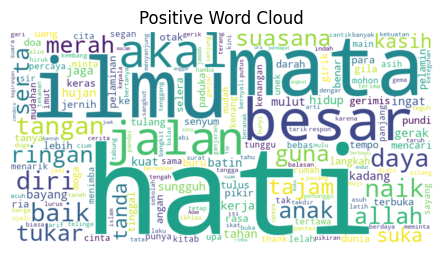

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you already have lexicon_positive and lexicon_negative dictionaries

# Combine all positive and negative words into a single list
positive_words = list(lexicon_positive.keys())


# Join the positive and negative words into two separate strings
positive_text = ' '.join(positive_words)

# Generate word clouds for positive and negative sentiments
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word clouds using matplotlib
plt.figure(figsize=(12, 6))

# Plotting the positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Word Cloud')



plt.show()

### Word-Cloud for Negative tweets

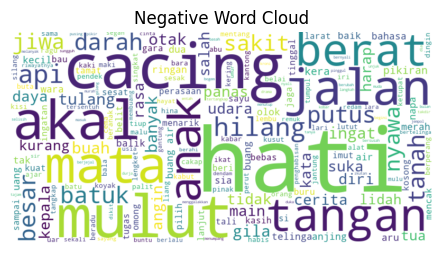

In [31]:
negative_words = list(lexicon_negative.keys())
negative_text = ' '.join(negative_words)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(12, 6))

# Plotting the negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Word Cloud')

plt.show()

### Analysis Data

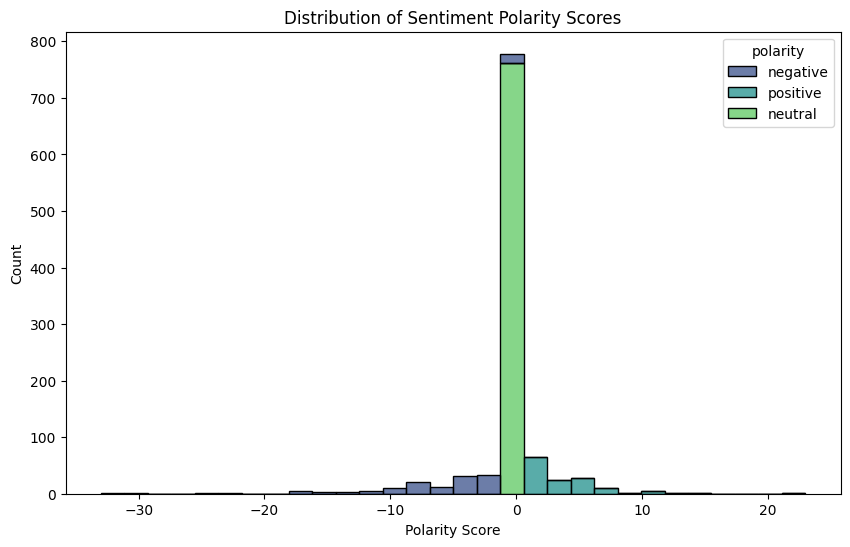

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Results from determine sentiment polarity of df
results = df['stemmed_tokens'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]

# Visualize the distribution of sentiment polarity scores and labels
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of sentiment polarity scores
sns.histplot(df, x='polarity_score', hue='polarity', multiple='stack', bins=30, palette='viridis', ax=ax)
ax.set_title('Distribution of Sentiment Polarity Scores')
ax.set_xlabel('Polarity Score')
ax.set_ylabel('Count')

plt.show()


Dari grafik ini, kita dapat melihat bahwa sentimen netral mendominasi kumpulan data ini dengan jumlah 40.

In [34]:
from collections import Counter
import pandas as pd

# Results from determining sentiment polarity of df
results = df['stemmed_tokens'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]

# Create a temporary list column containing tokenized words
df['temp_list'] = df['stemmed_tokens'].apply(lambda x: str(x).split())

# Get the most common words
top_words = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top_words.most_common(20))
temp.columns = ['Common_words', 'count']
temp.style.background_gradient(cmap='Blues')


,Common_words,count
0,"'covid',",1115
1,"'t',",1054
2,"'surabaya',",1051
3,"'co',",1051
4,"'vaksin',",933
5,"'lokasi',",749
6,"['jadwal',",392
7,"'jadwal',",366
8,"['beritajatim',",356
9,"'jadwalvaksin',",275


In [35]:
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\dllse\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:
import plotly.express as px

# Results from determining sentiment polarity of df
results = df['stemmed_tokens'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]

# Create a temporary list column containing tokenized words
df['temp_list'] = df['stemmed_tokens'].apply(lambda x: str(x).split())

# Get the most common words
top_words = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top_words.most_common(20))
temp.columns = ['Common_words', 'count']

# Create a Treemap
fig = px.treemap(temp, path=['Common_words'], values='count', title='Tree of Most Common Words')
fig.show()


## Split Train Test

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Assuming df is your DataFrame
X = df.iloc[:, :-1]  # all columns except the last one
y = df.iloc[:, -1]   # the last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Convert list of tokens to string
X_train['lemmatized_tokens'] = X_train['lemmatized_tokens'].apply(' '.join)

# Fit and transform X_train
X_train_tfidf = vectorizer.fit_transform(X_train['lemmatized_tokens'])

# Transform X_test
X_test['lemmatized_tokens'] = X_test['lemmatized_tokens'].apply(' '.join)
X_test_tfidf = vectorizer.transform(X_test['lemmatized_tokens'])

# Create an instance of LinearSVC
model = LinearSVC()

# Fit the model with the training data
model.fit(X_train_tfidf, y_train)

# Calculate the accuracy of the model
accuracy = model.score(X_test_tfidf, y_test)

print('Accuracy:', accuracy)
# Print the number of feature words
print('No. of feature words:', len(vectorizer.get_feature_names_out()))

Accuracy: 0.9138755980861244
No. of feature words: 1988


C:\Users\dllse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
